<a href="https://colab.research.google.com/github/bestekucuk/DataAnalyzing-and-Forecasting/blob/main/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm



In [ ]:
path="/content/drive/MyDrive/Database/veri.xlsx"
data=pd.read_excel(path)
data.head(50)

,cinsiyet,yas,gunde_uyku_saati,yasadiginiz_yer,uyanma_saati,uykuya_dalmada_sorun_varmi,uyumadan_onceki_aktivite,uyku_kalitesi,uyaninca_yorgun_hissedermi,uyanmada_zorluk_yasarmi,...,tukettigi_besin_grubu,kahvalti_yaparmi,ogun_atlarmi,ogun_sayisi,fast_food_tuketme_durumu,saglikli_ara_ogun_tuketme,ek_takviye_vitamin_kullanma,uykudan_once_kafein_tuketme,uykudan_kac_saat_once_yemek_yer,uyumadan_once_atistirmalik_tuketirmi
0,1,25,2,0,1,1,1,2,1,5,...,1,1,1,2,3,1,0,0,1,1
1,1,22,2,0,3,1,1,4,0,2,...,1,1,0,3,2,2,0,0,2,0
2,0,21,3,1,3,0,1,4,0,1,...,4,1,0,3,3,2,0,0,3,0
3,0,23,3,1,3,0,2,4,1,1,...,2,1,0,4,4,3,0,0,1,1
4,0,20,2,0,3,1,3,3,1,2,...,1,0,1,2,2,1,0,0,3,0
5,1,20,3,1,3,0,1,3,1,2,...,1,0,1,2,3,3,0,1,2,0
6,1,21,2,0,3,0,2,4,0,4,...,4,1,1,2,2,1,0,1,2,1
7,0,23,3,1,3,0,1,4,1,3,...,1,0,1,3,4,4,0,0,1,0
8,0,23,3,1,4,0,1,3,1,4,...,4,1,1,2,1,5,0,0,2,0
9,1,23,2,1,3,1,1,3,1,4,...,1,0,1,2,2,2,1,1,2,0


**Veri Önişleme**

In [ ]:
# Hedef değişken (uyku_kalitesi) ve özellikler (X) olarak ayırma
X = data.drop('uyku_kalitesi', axis=1)  # 'uyku_kalitesi' dışındaki sütunlar
y = data['uyku_kalitesi']  # 'uyku_kalitesi' sütunu

# Eğitim ve test setlerine ayırma (70-30 oranında)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_test.shape[0]

58

In [ ]:
#Ölçeklendirme
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [ ]:
sc=StandardScaler()

In [ ]:
sc

StandardScaler()

**Veri Setlerini Hazırlama PCA ve PCA siz**

In [ ]:
x_train=sc.fit_transform(x_train)
#StandardScaler, özellikleri ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürerek standartlaşta işlemi yapar.
#özelliklerin birbirlerine göre ölçeksiz olmalarını sağlayarak, makine öğrenimi modellerinin daha iyi performans göstermesine yardımcı olabilir.
x_test=sc.fit_transform(x_test)

# PCA(Temel Bileşen Analizi)

In [ ]:
# Kovaryans matrisini hesaplayın
cov_matrix = np.cov(x_train, rowvar=False)
# Özdeğer ve özvektörleri hesaplayın
eig_values, eig_vectors = np.linalg.eig(cov_matrix)



In [ ]:
# Özdeğerleri büyükten küçüğe sıralayın
idx = np.argsort(eig_values)[::-1]
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:, idx]

In [ ]:
X.shape[1]

26

In [ ]:
y

0      2
1      4
2      4
3      4
4      3
      ..
285    5
286    3
287    3
288    4
289    4
Name: uyku_kalitesi, Length: 290, dtype: int64

In [ ]:
#PCA k degerine göre veri seti oluşturma fonksiyonu
#parametre olarak data=eig_vectors
k=X.shape[1]
selected_components = eig_vectors[:, :k]
# Yeni veri matrisini oluşturun
X_pca = X.dot(selected_components)
#ekran çıktısı alma
# Orijinal öznitelik isimleri
feature_names = list(X.columns)
# Ağırlık vektörlerini DataFrame'e dönüştürme
weights_df = pd.DataFrame(selected_components, columns=[f'PC{i+1}' for i in range(selected_components.shape[1])], index=feature_names)
# DataFrame'i yazdırma
print(weights_df)

                                           PC1       PC2       PC3       PC4  \
cinsiyet                              0.079275 -0.242345  0.141985 -0.411772   
yas                                  -0.141674 -0.211541 -0.348617  0.083133   
gunde_uyku_saati                     -0.048091  0.206661  0.141362 -0.045855   
yasadiginiz_yer                      -0.096225 -0.012891 -0.468238  0.113853   
uyanma_saati                         -0.083171  0.249519 -0.092454 -0.057048   
uykuya_dalmada_sorun_varmi            0.188616 -0.156557  0.029137 -0.254594   
uyumadan_onceki_aktivite             -0.138626 -0.014624 -0.088166 -0.213453   
uyaninca_yorgun_hissedermi            0.279949  0.029717 -0.076372 -0.331644   
uyanmada_zorluk_yasarmi               0.284658  0.181124 -0.223020 -0.238177   
tek_alarmla_uyanirmi                 -0.177518 -0.187243  0.338388  0.114007   
gece_kac_kere_uyanir                  0.057900 -0.333500  0.107897 -0.185506   
kafein_tuketme_durumu                 0.

**Model Kurma**

In [ ]:
#Lojistik Regresyon
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',random_state=0)
# model.fit(x_train,y_train)

In [ ]:
#Support Vector Machine
model_svc_rbf = SVC(kernel='rbf')
# model_svc_rbf.fit(x_train, y_train)


In [ ]:
# KNN modelini oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=25)  # K = 50 olarak seçildi (değiştirilebilir)
# knn.fit(x_train, y_train)

In [ ]:
y_pred_no_pca = knn.predict(x_test)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
accuracy_no_pca

NameError: name 'accuracy_no_pca' is not defined

In [ ]:
knn.predict(x_test)


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#Logistic Regresyon with hiyerarsı
# Hiyerarşik lojistik regresyon için sm.Logit kullanarak modeli kur
a_train = sm.add_constant(x_train)  # Sabit terimi ekleyin
model_sm = sm.MNLogit(y_train, a_train)
# result = model_sm.fit()

# # Modelin özetini görüntüle
# print(result.summary())

Modellere Göre Tahmin Etme

In [ ]:
models = {
    'KNN': knn,
    'Logistic_Regresyon': model,
    'SVM_RBF': model_svc_rbf
}

# Sonuçları depolamak için bir DataFrame oluşturun
results_df = pd.DataFrame(columns=['Model', 'K', 'Accuracy_No_PCA', 'Accuracy_With_PCA'])

# Kullanılacak k değerleri
k_values = list(range(1, 27))
for model_name, model in models.items():
    for k in k_values:
        # PCA'sız model eğitimi ve accuracy değeri
        model.fit(x_train, y_train)
        y_pred_no_pca = model.predict(x_test)
        accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
        conf_matrix=confusion_matrix(y_test, y_pred_no_pca)
        # PCA uygulanması
        pca = PCA(n_components=k)
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.fit_transform(x_test)

        # PCA'lı model eğitimi ve accuracy değeri
        model.fit(x_train_pca, y_train)
        y_pred_with_pca = model.predict(x_test_pca)
        accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
        conf_matrix_pca=confusion_matrix(y_test,y_pred_with_pca )
        print(conf_matrix)
        print(conf_matrix_pca)
        # Sonuçları DataFrame'e ekleyin
        results_df = results_df.append({
            'Model': model_name,
            'K': k,
            'Accuracy_No_PCA': accuracy_no_pca,
            'Accuracy_With_PCA': accuracy_with_pca
        }, ignore_index=True)

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  2 28  0  0]
 [ 0  0 14  2  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 14  2  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 30  0  0]
 [ 0  0 14  2  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]

<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  1  8  0  0]
 [ 0  0 28  2  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 30  0  0]
 [ 0  0 15  1  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  8  1  0]
 [ 0  0 25  5  0]
 [ 0  0 14  2  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  8  1  0]
 [ 0  0 27  3  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 25  5  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]

<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({



[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 25  5  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 30  0  0]
 [ 0  0 15  1  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 29  1  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  8  1  0]
 [ 0  0 25  5  0]
 [ 0  0 14  2  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  8  1  0]
 [ 0  0 27  3  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 28  2  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 13  3  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 25  5  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 25  5  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 11  5  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]
[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  1 27  2  0]
 [ 0  0  8  8  0]
 [ 0  0  1  0  0]]
[[ 0  0  1  1  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 12  4  0]
 [ 0  0  1  0  0]]


<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-28-0ca4a7b08df2>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [ ]:
y_pred_no_pca = knn.predict(x_test)
conf_matrix=confusion_matrix(y_test, y_pred_no_pca)
print(conf_matrix)

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 16  0  0]
 [ 0  0  1  0  0]]


In [ ]:
y_pred_no_pca = model.predict(x_test)
conf_matrix=confusion_matrix(y_test, y_pred_no_pca)
print(conf_matrix)

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 16  0  0]
 [ 0  0  1  0  0]]


In [ ]:
y_pred_no_pca = model_svc_rbf.predict(x_test)
conf_matrix=confusion_matrix(y_test, y_pred_no_pca)
print(conf_matrix)

[[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 26  4  0]
 [ 0  0 16  0  0]
 [ 0  0  1  0  0]]


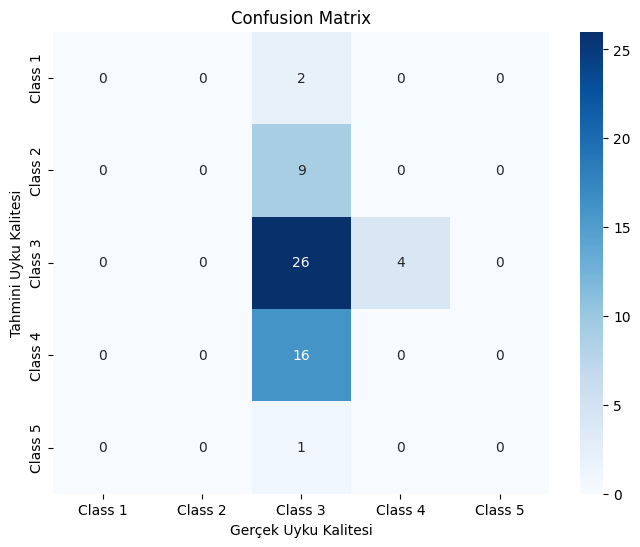

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Verilen confusion matrix
conf_matrix = np.array([[ 0 , 0 , 2,  0 , 0],
 [ 0,  0,  9 , 0 , 0],
 [ 0,  0, 26,  4,  0],
 [ 0 , 0, 16 , 0,  0],
 [ 0 , 0 , 1  ,0 , 0]])

# Sınıf etiketleri
class_labels = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Gerçek Uyku Kalitesi")
plt.ylabel("Tahmini Uyku Kalitesi")
plt.show()

In [ ]:
print(results_df)

Empty DataFrame
Columns: [Model, K, Accuracy_No_PCA, Accuracy_With_PCA]
Index: []


In [ ]:

from sklearn.metrics import confusion_matrix

In [ ]:
results_df

,Model,K,Accuracy_No_PCA,Accuracy_With_PCA
0,KNN,1,0.551724,0.568966
1,KNN,2,0.551724,0.517241
2,KNN,3,0.551724,0.534483
3,KNN,4,0.551724,0.551724
4,KNN,5,0.551724,0.517241
...,...,...,...,...
73,SVM_RBF,22,0.603448,0.534483
74,SVM_RBF,23,0.603448,0.534483
75,SVM_RBF,24,0.603448,0.517241
76,SVM_RBF,25,0.603448,0.534483


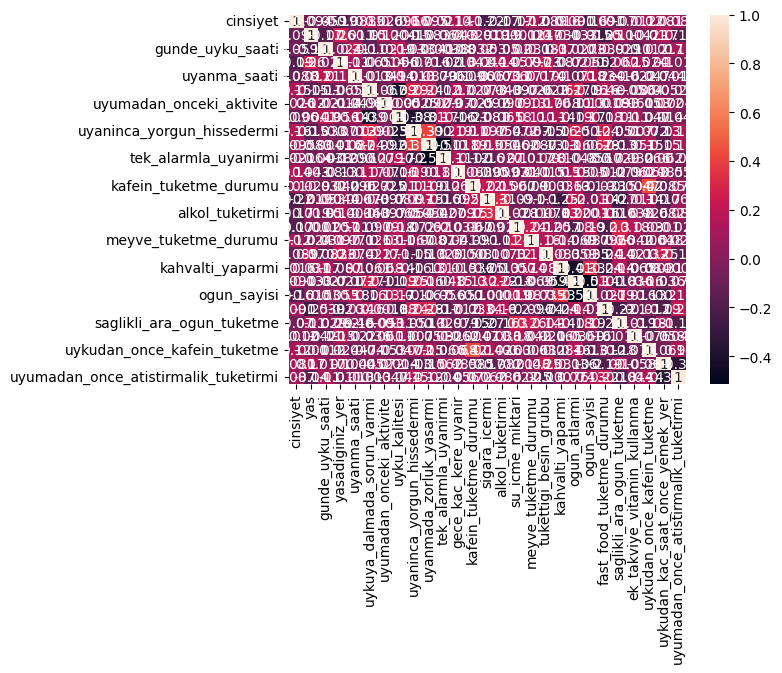

In [ ]:
# prompt: data veri setinin  Descriptive Statistics değerlerini bul ve öznitelikler arasındaki ilişkiyi değerlendir

data.describe()
# Veri setinin özniteliklerinin arasındaki ilişkiyi değerlendirmek için bir korelasyon matrisi oluşturalım.
# Korelasyon matrisi, iki değişken arasındaki ilişkiyi gösteren bir tablodur.
# Korelasyon katsayısı -1 ile 1 arasında değişir.
# -1 değeri iki değişkenin tam tersi yönde ilişkili olduğunu,
# 0 değeri iki değişkenin hiç ilişkili olmadığını,
# 1 değeri ise iki değişkenin aynı yönde ilişkili olduğunu gösterir.

corr = data.corr()
# Korelasyon matrisini görselleştirelim.
# Korelasyon matrisini görselleştirmek için Seaborn kütüphanesinin heatmap() fonksiyonunu kullanacağız.
# heatmap() fonksiyonu, bir matrisi ısı haritası olarak görselleştirir.
# Isı haritasında, satır ve sütun başlıkları değişkenlerin adlarıdır.
# Hücrelerin rengi, değişkenler arasındaki korelasyon katsayısını gösterir.

sns.heatmap(corr, annot=True)
plt.show()


Ki-kare İstatistiği:

Ki-kare istatistiği, gözlemlenen ve beklenen frekanslar arasındaki farkların karelerinin oranının toplamını ifade eder. Bu değer ne kadar yüksekse, gözlemlenen ve beklenen frekanslar arasındaki fark o kadar büyük olabilir.

P Değeri:

P değeri, H0 hipotezinin reddedilme olasılığını gösterir. Eğer p değeri belirli bir anlamlılık düzeyinden (alfa seviyesi) küçükse, H0 hipotezi reddedilir. Ancak, p değeri 1.0 olduğu için H0 hipotezi reddedilemez.. Eğer p değeri düşük olsaydı (örneğin, 0.05'ten küçük), gözlemlenen ve beklenen frekanslar arasında anlamlı bir fark olduğunu düşünebilirdiniz. Ancak, 1.0 olan p değeri, bu farkın istatistiksel olarak anlamlı olmadığını göstermektedir.

In [ ]:
from scipy.stats import chi2_contingency

# Örnek veri seti


# Ki-kare testini gerçekleştirme
chi2_stat, p_val, dof, expected = chi2_contingency(data)

# Hesaplanan istatistik ve p değerini yazdırma
print(f"Ki-kare istatistiği: {chi2_stat}")
print(f"P değeri: {p_val}")


Ki-kare istatistiği: 3718.729349087671
P değeri: 1.0



**Q-Q çizgisi** (Quantile-Quantile plot), bir veri setinin teorik bir dağılıma (örneğin, normal dağılım) ne kadar uygun olduğunu değerlendirmek için kullanılan bir grafik yöntemidir.

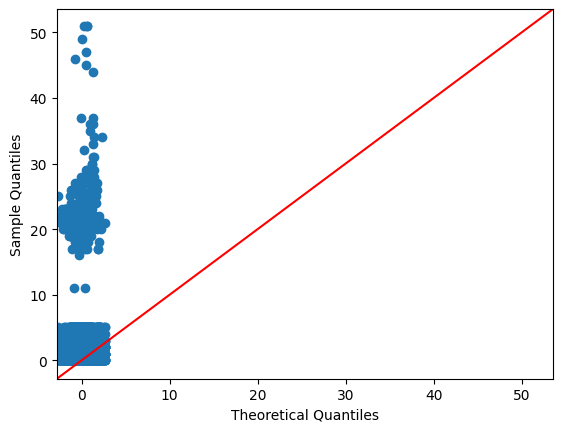

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Q-Q çizgisi oluşturma
sm.qqplot(data, line='45')  # '45' çizgisini ekleyerek Q-Q çizgisini oluşturur

# Grafik gösterimi
plt.show()


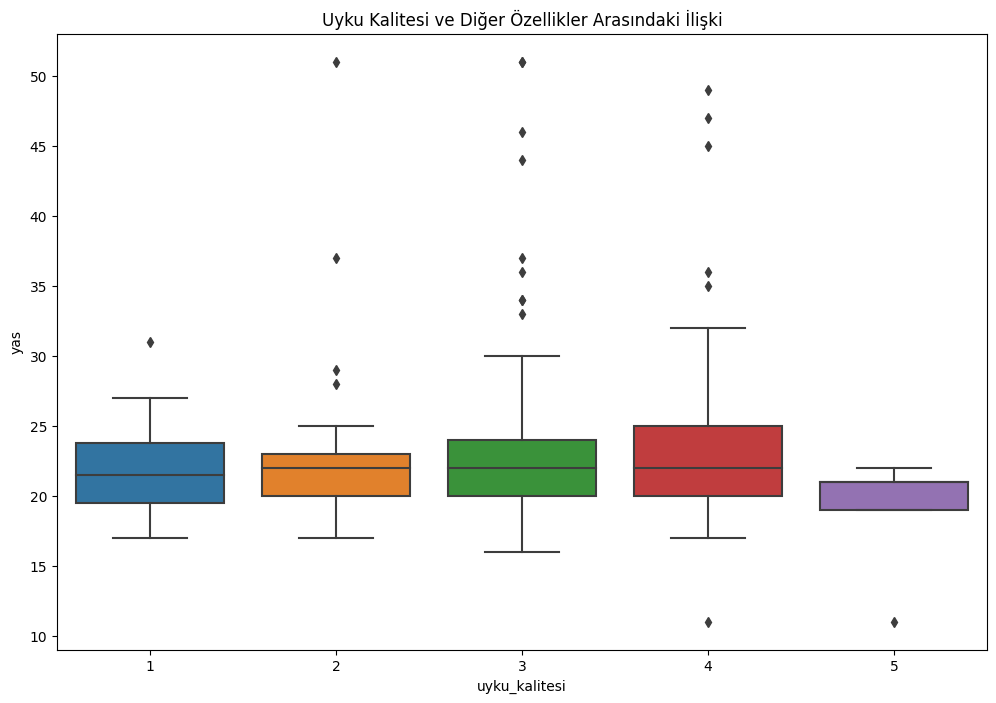

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='uyku_kalitesi', y='yas', data=data)
plt.title('Uyku Kalitesi ve Diğer Özellikler Arasındaki İlişki')
plt.show()


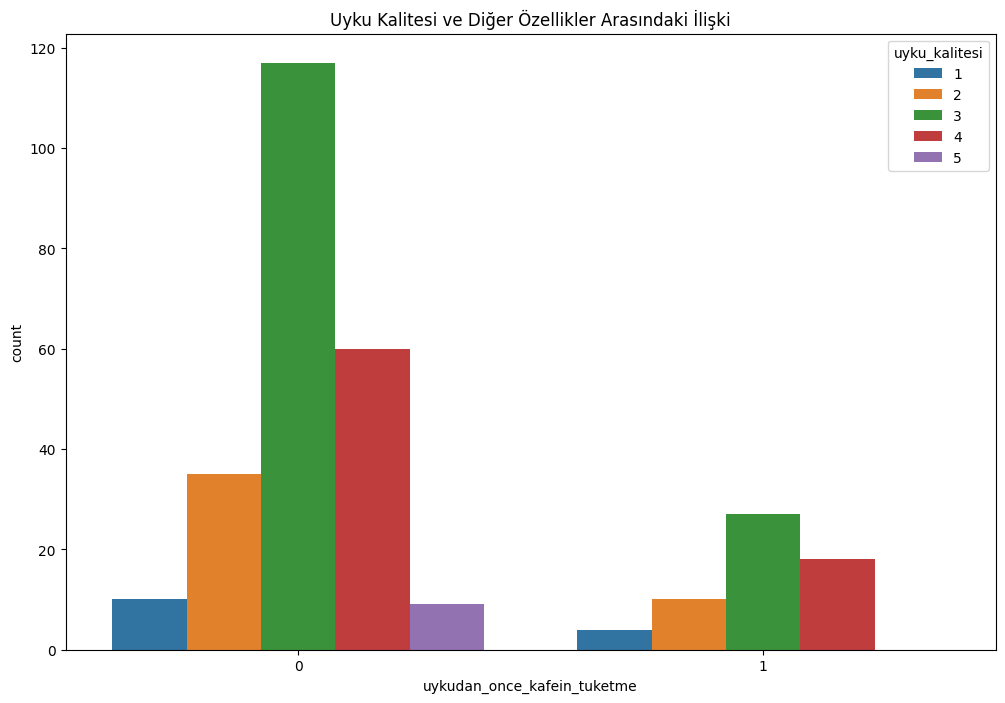

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='uykudan_once_kafein_tuketme', hue='uyku_kalitesi', data=data)
plt.title('Uyku Kalitesi ve Diğer Özellikler Arasındaki İlişki')
plt.show()


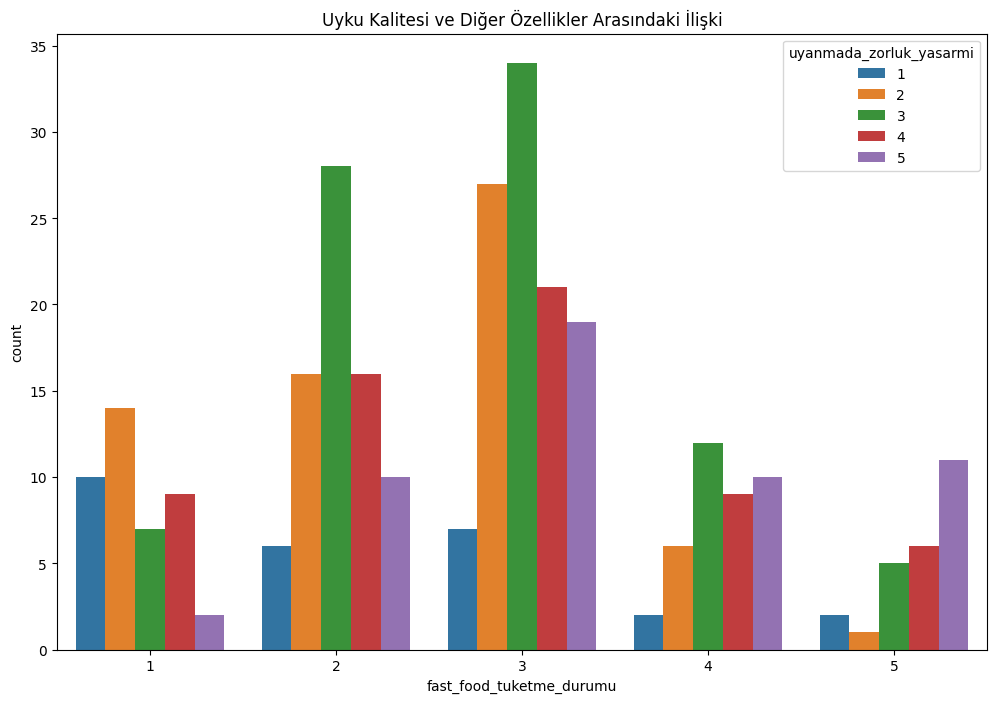

In [ ]:
correlation_matrix = data[['fast_food_tuketme_durumu', 'uyanmada_zorluk_yasarmi']].corr()
print(correlation_matrix)

                          fast_food_tuketme_durumu  uyanmada_zorluk_yasarmi
fast_food_tuketme_durumu                  1.000000                 0.277613
uyanmada_zorluk_yasarmi                   0.277613                 1.000000


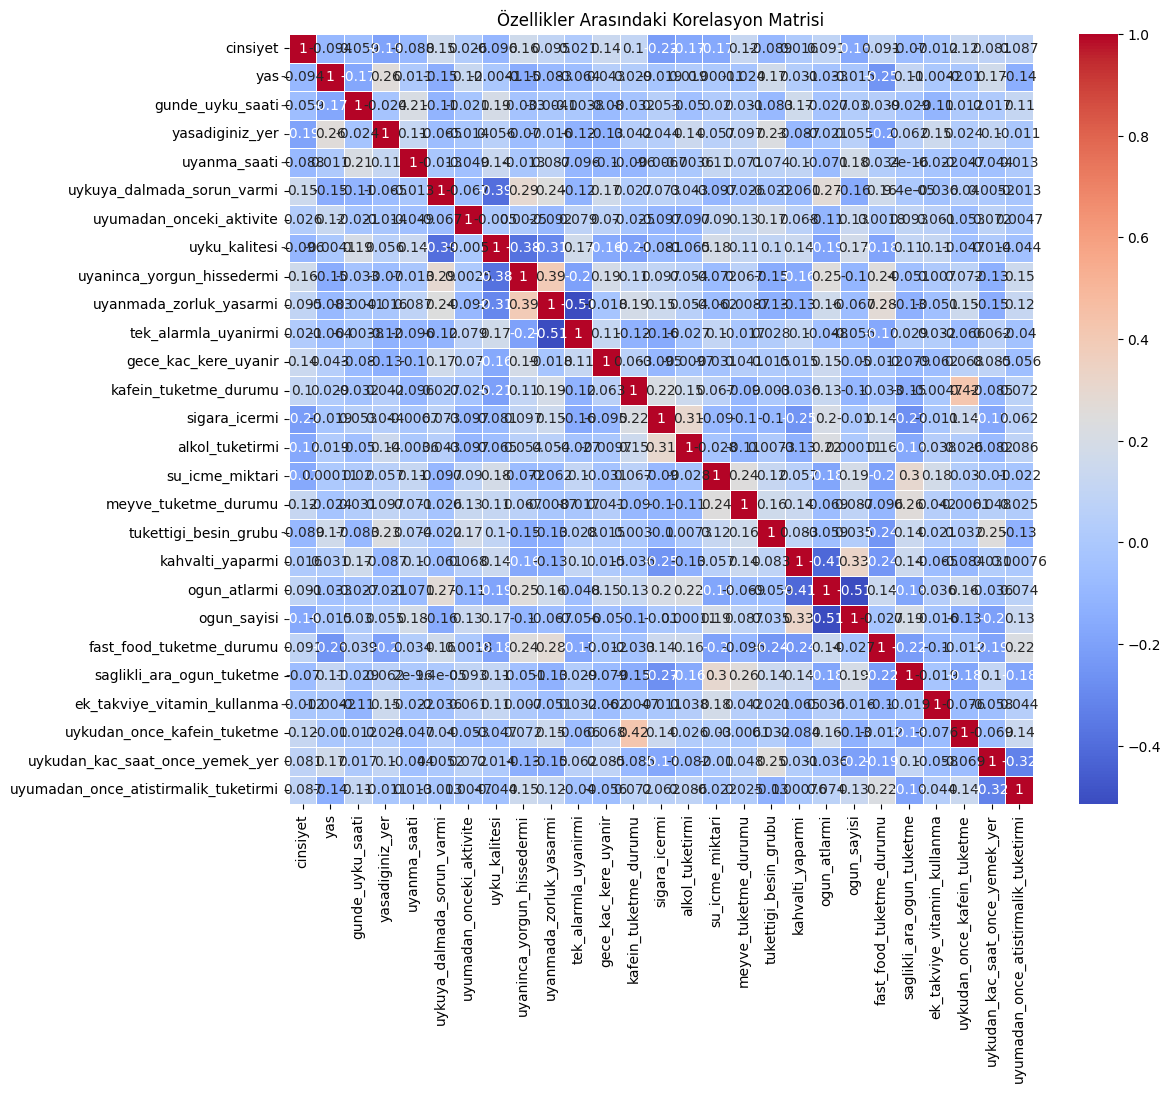

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Matrisi')
plt.show()


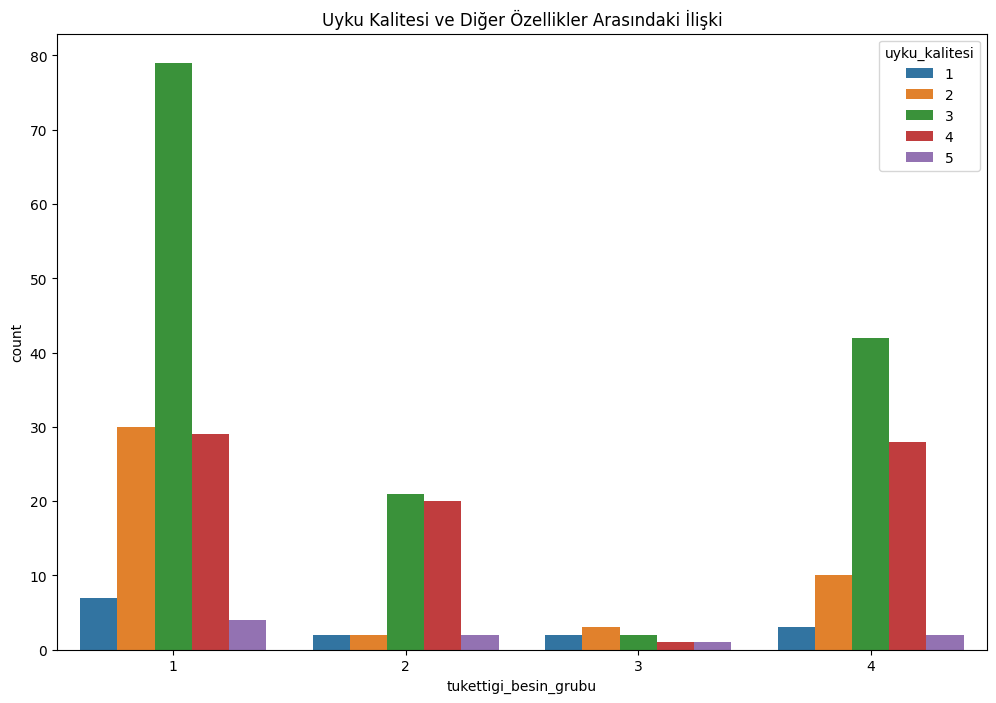

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='tukettigi_besin_grubu', hue='uyku_kalitesi', data=data)
plt.title('Uyku Kalitesi ve Diğer Özellikler Arasındaki İlişki')
plt.show()

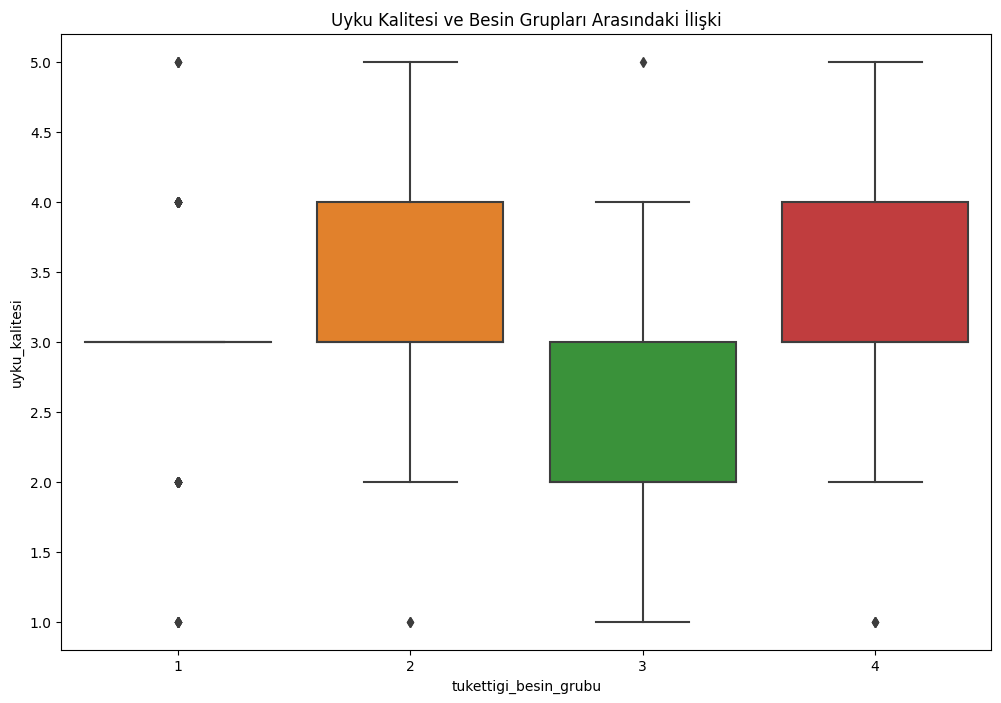

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='tukettigi_besin_grubu', y='uyku_kalitesi', data=data)
plt.title('Uyku Kalitesi ve Besin Grupları Arasındaki İlişki')
plt.show()


In [ ]:
correlation_matrix = data[['ogun_atlarmi', 'uykuya_dalmada_sorun_varmi']].corr()
print(correlation_matrix)


                            ogun_atlarmi  uykuya_dalmada_sorun_varmi
ogun_atlarmi                    1.000000                    0.266538
uykuya_dalmada_sorun_varmi      0.266538                    1.000000


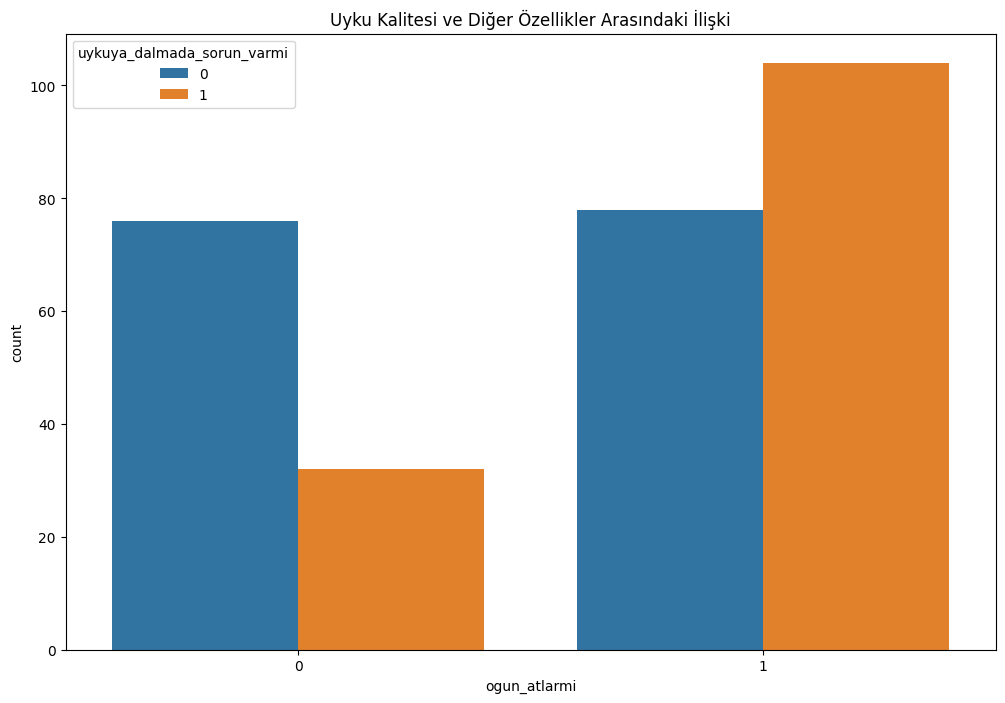

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='ogun_atlarmi', hue='uykuya_dalmada_sorun_varmi', data=data)
plt.title('Uyku Kalitesi ve Diğer Özellikler Arasındaki İlişki')
plt.show()

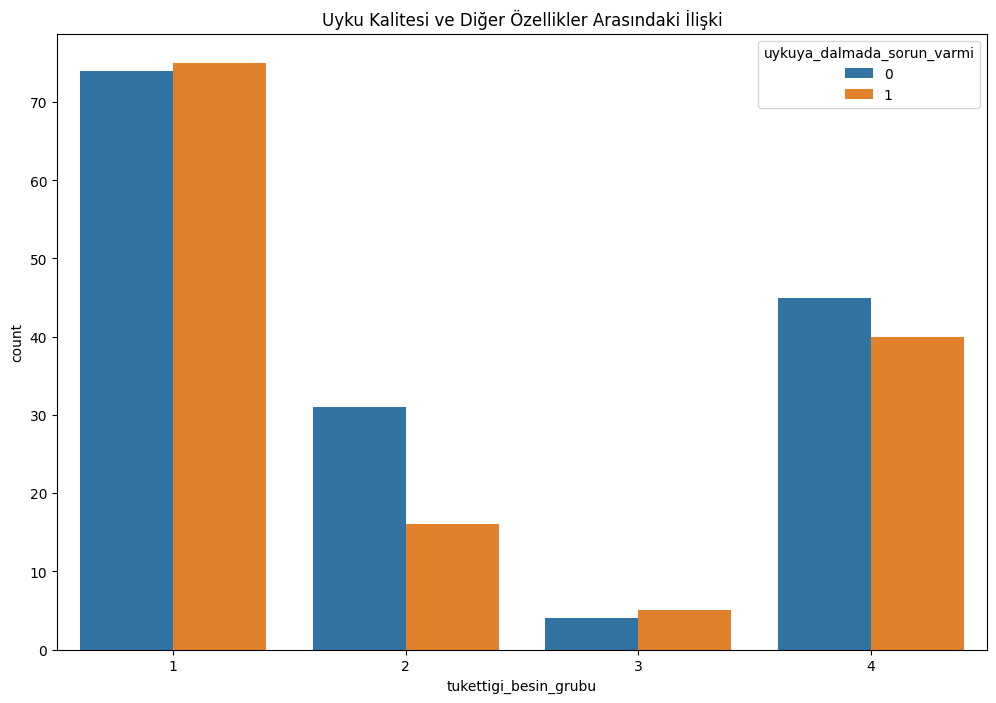

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='tukettigi_besin_grubu', hue='uykuya_dalmada_sorun_varmi', data=data)
plt.title('Uyku Kalitesi ve Diğer Özellikler Arasındaki İlişki')
plt.show()

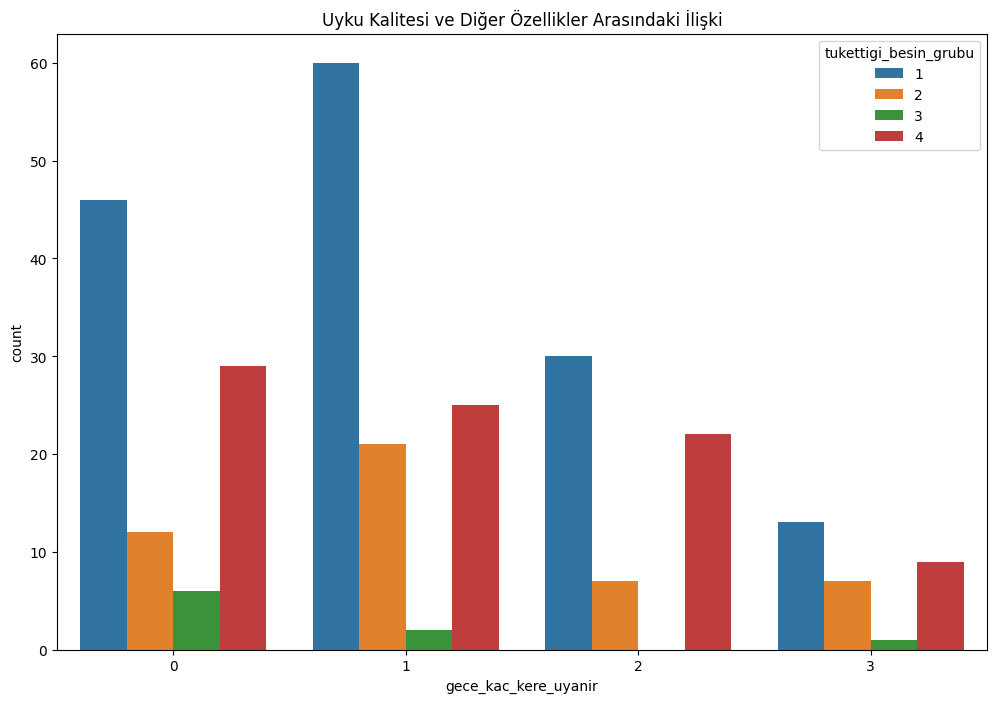

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(hue='tukettigi_besin_grubu', x='gece_kac_kere_uyanir', data=data)
plt.title('Uyku Kalitesi ve Diğer Özellikler Arasındaki İlişki')
plt.show()

Index(['cinsiyet', 'yas', 'gunde_uyku_saati', 'yasadiginiz_yer',
       'uyanma_saati', 'uykuya_dalmada_sorun_varmi',
       'uyumadan_onceki_aktivite', 'uyku_kalitesi',
       'uyaninca_yorgun_hissedermi', 'uyanmada_zorluk_yasarmi',
       'tek_alarmla_uyanirmi', 'gece_kac_kere_uyanir', 'kafein_tuketme_durumu',
       'sigara_icermi', 'alkol_tuketirmi', 'su_icme_miktari',
       'meyve_tuketme_durumu', 'tukettigi_besin_grubu', 'kahvalti_yaparmi',
       'ogun_atlarmi', 'ogun_sayisi', 'fast_food_tuketme_durumu',
       'saglikli_ara_ogun_tuketme', 'ek_takviye_vitamin_kullanma',
       'uykudan_once_kafein_tuketme', 'uykudan_kac_saat_once_yemek_yer',
       'uyumadan_once_atistirmalik_tuketirmi'],
      dtype='object')

In [ ]:
correlation_matrix = data[['tukettigi_besin_grubu', 'gece_kac_kere_uyanir']].corr()
print(correlation_matrix)

                       tukettigi_besin_grubu  gece_kac_kere_uyanir
tukettigi_besin_grubu               1.000000              0.014536
gece_kac_kere_uyanir                0.014536              1.000000


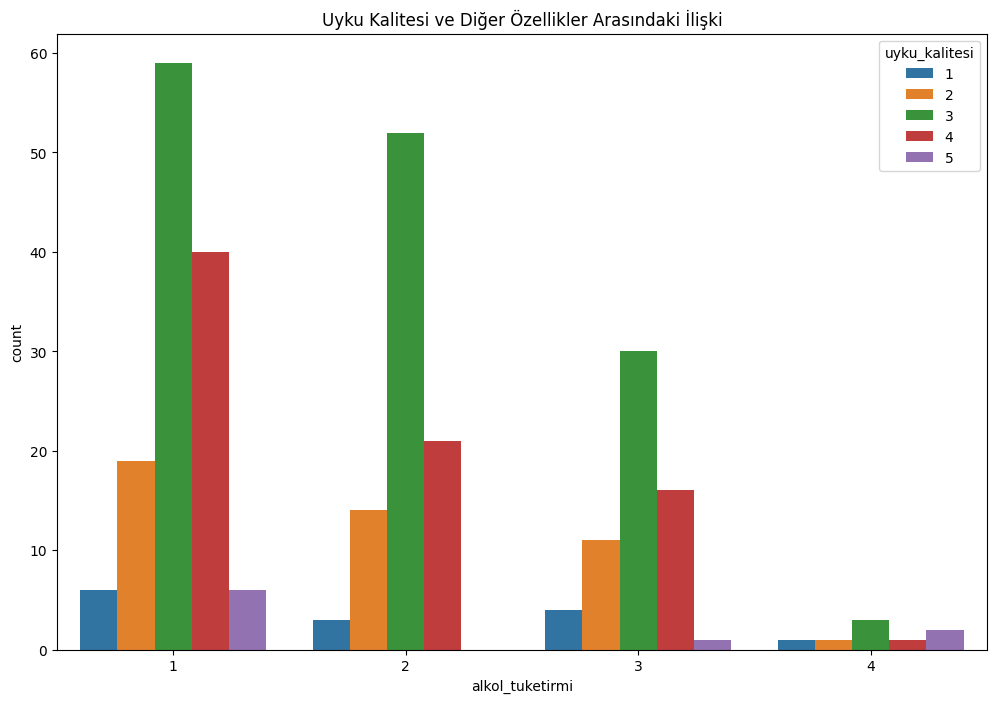

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='alkol_tuketirmi', hue='uyku_kalitesi', data=data)
plt.title('Uyku Kalitesi ve Diğer Özellikler Arasındaki İlişki')
plt.show()

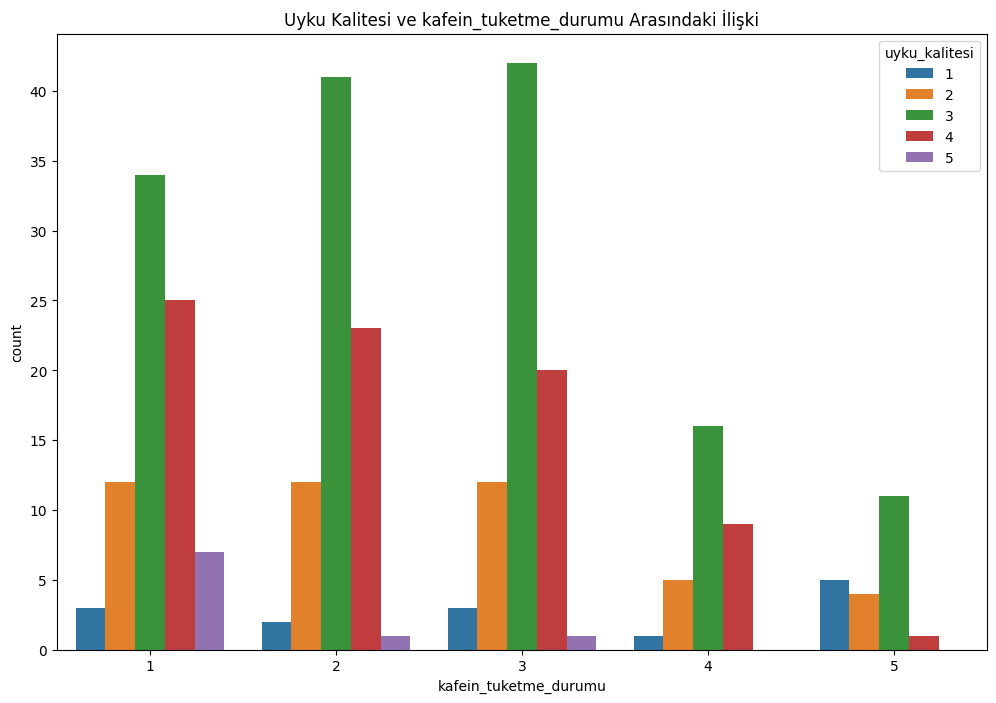

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='kafein_tuketme_durumu', hue='uyku_kalitesi', data=data)
plt.title('Uyku Kalitesi ve kafein_tuketme_durumu Arasındaki İlişki')
plt.show()

<ipython-input-60-6f337ee9df6c>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=besin_grubu_sutunu, y=uyku_kalitesi_sutunu, data=data, marker='o', ci=None)


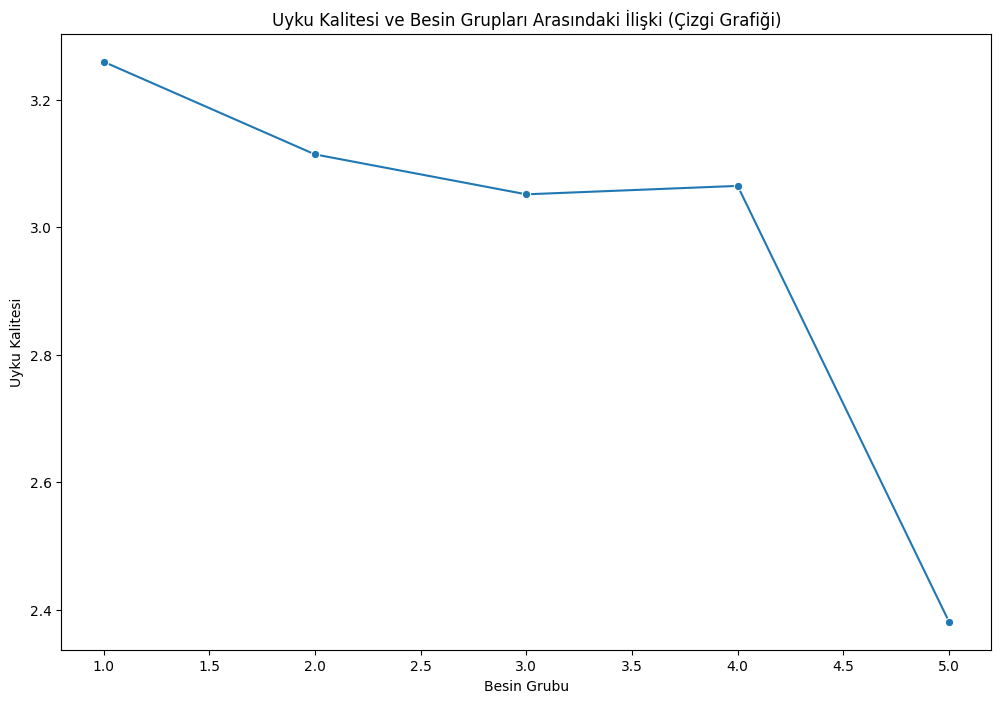

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Örnek veri seti oluşturma
# df = pd.read_csv('veri.csv')  # Veriyi yükleyin, dosya adını ve formatını uygun şekilde belirtin
# Yukarıdaki satır gerçek veri setinizi yüklemek için kullanılır.

# Uygun sütun adlarını ve uyku kalitesi kategorilerini belirleyin
uyku_kalitesi_sutunu = 'uyku_kalitesi'
besin_grubu_sutunu = 'kafein_tuketme_durumu'

# Çizgi grafiği çizimi
plt.figure(figsize=(12, 8))
sns.lineplot(x=besin_grubu_sutunu, y=uyku_kalitesi_sutunu, data=data, marker='o', ci=None)
plt.title('Uyku Kalitesi ve Besin Grupları Arasındaki İlişki (Çizgi Grafiği)')
plt.xlabel('Kafein Tüketim')
plt.ylabel('Uyku Kalitesi')
plt.show()

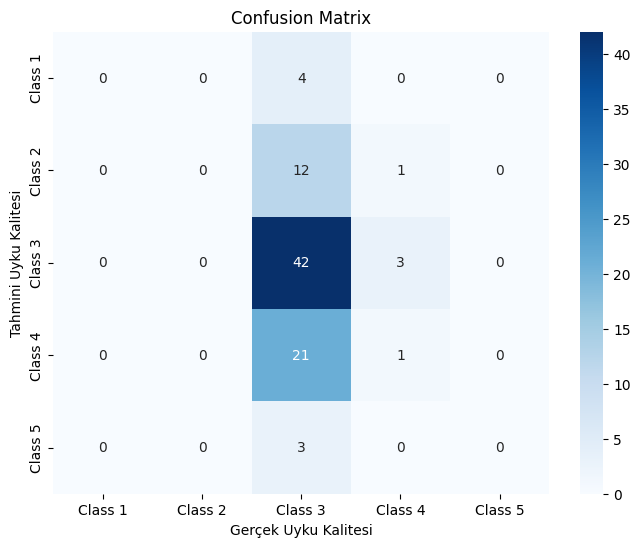

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Verilen confusion matrix
conf_matrix = np.array([[ 0  0  2  0  0]
 [ 0  0  9  0  0]
 [ 0  0 27  3  0]
 [ 0  0 16  0  0]
 [ 0  0  1  0  0]])

# Sınıf etiketleri
class_labels = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Gerçek Uyku Kalitesi")
plt.ylabel("Tahmini Uyku Kalitesi")
plt.show()
